In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
df_produ = pd.read_csv("Crop Production.csv")
df_soil = pd.read_csv("Soil Type.csv")
df_rain = pd.read_csv("Rainfall.csv")

In [3]:
df_produ.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df_produ.rename(columns={'State_Name': 'State', 'District_Name': 'District', 'Crop_Year':'Year'}, inplace=True)

In [5]:
df_produ.head()

,State,District,Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [6]:
mask_up = (df_produ['State'] == 'Maharashtra') | (df_produ['State'] == 'Tamil Nadu') | (df_produ['State'] == 'Uttar Pradesh') | (df_produ['State'] == 'West Bengal')

In [7]:
df_prod = df_produ[mask_up]

In [8]:
df_prod.to_csv("Crop_Production.csv", index=False)

In [9]:
top_crops = ['Maize', 'Urad', 'Sugarcane', 'Wheat', 'Rice']

In [10]:
df_prod = df_prod[df_prod['Crop'].isin(top_crops)]

In [11]:
df_prod.head()

,State,District,Year,Season,Crop,Area,Production
125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,1113.0
125196,Maharashtra,AHMEDNAGAR,1997,Kharif,Maize,4400.0,4700.0
125200,Maharashtra,AHMEDNAGAR,1997,Kharif,Rice,5900.0,7200.0
125201,Maharashtra,AHMEDNAGAR,1997,Kharif,Sugarcane,45900.0,38940.0
125203,Maharashtra,AHMEDNAGAR,1997,Kharif,Urad,1600.0,800.0


In [12]:
df_prod.shape

(16440, 7)

In [13]:
df_prod.Year.unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype=int64)

In [14]:
df_prod = df_prod[(df_prod['Year'] >= 2012) & (df_prod['Year'] <= 2014)]

In [15]:
df_prod.Year.unique()

array([2012, 2013, 2014], dtype=int64)

In [16]:
df_prod.Season.unique()

array(['Kharif     ', 'Rabi       ', 'Summer     ', 'Whole Year ',
       'Autumn     ', 'Winter     '], dtype=object)

In [17]:
df_prod['Season'] = df_prod['Season'].str.strip().str.capitalize()

In [18]:
df_prod['Season'].replace({'Summer':'Kharif', 'Winter':'Rabi'}, inplace=True)

In [19]:
df_prod.Season.unique()

array(['Kharif', 'Rabi', 'Whole year', 'Autumn'], dtype=object)

In [20]:
df_prod.drop(df_prod[df_prod['Season'] == 'Autumn'].index, inplace=True)

In [21]:
df_prod.Season.unique()

array(['Kharif', 'Rabi', 'Whole year'], dtype=object)

In [22]:
df_prod.to_csv('Crop_Production.csv', index=False)

In [23]:
df_prod['District'] = df_prod['District'].str.strip().str.capitalize()

In [24]:
df_prod.District.value_counts()

District
Sitapur          27
Deoria           27
Gorakhpur        27
Maharajganj      27
Hardoi           26
                 ..
Thiruvarur        8
Kanniyakumari     7
Ratnagiri         5
The nilgiris      4
Palghar           1
Name: count, Length: 158, dtype: int64

In [25]:
df_prod.to_csv('Crop_Production.csv', index=False)

In [26]:
df_prod.Crop.unique()

array(['Maize', 'Rice', 'Urad', 'Wheat', 'Sugarcane'], dtype=object)

In [27]:
target_states = ['Maharashtra', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal']

In [28]:
df_prod.District.unique()

array(['Ahmednagar', 'Akola', 'Amravati', 'Aurangabad', 'Beed',
       'Bhandara', 'Buldhana', 'Chandrapur', 'Dhule', 'Gadchiroli',
       'Gondia', 'Hingoli', 'Jalgaon', 'Jalna', 'Kolhapur', 'Latur',
       'Nagpur', 'Nanded', 'Nandurbar', 'Nashik', 'Osmanabad', 'Palghar',
       'Parbhani', 'Pune', 'Raigad', 'Ratnagiri', 'Sangli', 'Satara',
       'Sindhudurg', 'Solapur', 'Thane', 'Wardha', 'Washim', 'Yavatmal',
       'Ariyalur', 'Coimbatore', 'Cuddalore', 'Dharmapuri', 'Dindigul',
       'Erode', 'Kanchipuram', 'Kanniyakumari', 'Karur', 'Krishnagiri',
       'Madurai', 'Nagapattinam', 'Namakkal', 'Perambalur', 'Pudukkottai',
       'Ramanathapuram', 'Salem', 'Sivaganga', 'Thanjavur',
       'The nilgiris', 'Theni', 'Thiruvallur', 'Thiruvarur',
       'Tiruchirappalli', 'Tirunelveli', 'Tiruppur', 'Tiruvannamalai',
       'Tuticorin', 'Vellore', 'Villupuram', 'Virudhunagar', 'Agra',
       'Aligarh', 'Allahabad', 'Ambedkar nagar', 'Amethi', 'Amroha',
       'Auraiya', 'Azamgarh', 'Ba

In [29]:
district_counts = df_prod.groupby(['State', 'District']).size().reset_index(name='Count')

In [30]:
district_counts_sorted = district_counts.sort_values(by=['State','Count'], ascending=[True, False])

In [31]:
top_15_districts = district_counts_sorted.groupby('State').head(15)['District']

In [32]:
df_prod = df_prod[df_prod['District'].isin(top_15_districts)]

In [33]:
print(df_prod)

              State    District  Year      Season       Crop      Area  \
125615  Maharashtra  Ahmednagar  2012      Kharif      Maize   45000.0   
125620  Maharashtra  Ahmednagar  2012      Kharif       Rice    7500.0   
125624  Maharashtra  Ahmednagar  2012      Kharif       Urad    6100.0   
125628  Maharashtra  Ahmednagar  2012        Rabi      Maize   14700.0   
125632  Maharashtra  Ahmednagar  2012        Rabi      Wheat   38900.0   
...             ...         ...   ...         ...        ...       ...   
246084  West Bengal     Purulia  2014        Rabi      Wheat    1622.0   
246085  West Bengal     Purulia  2014      Kharif      Maize     325.0   
246086  West Bengal     Purulia  2014      Kharif       Rice     306.0   
246088  West Bengal     Purulia  2014  Whole year  Sugarcane     324.0   
246089  West Bengal     Purulia  2014        Rabi       Rice  279151.0   

        Production  
125615     91900.0  
125620      4600.0  
125624      1100.0  
125628     24800.0  
125632

In [34]:
df_prod.District.value_counts()

District
Deoria                27
Gorakhpur             27
Maharajganj           27
Sitapur               27
Unnao                 26
Hardoi                26
Kheri                 26
Mainpuri              25
Meerut                25
Moradabad             25
Shahjahanpur          25
Ambedkar nagar        24
Azamgarh              24
Bahraich              24
Amroha                24
Coochbehar            24
Darjeeling            24
Dinajpur uttar        24
Jalpaiguri            24
Medinipur west        24
Murshidabad           24
Nadia                 24
24 paraganas north    23
Bardhaman             22
Kolhapur              22
Bankura               21
Birbhum               21
Maldah                21
Beed                  20
Ahmednagar            20
Solapur               20
Satara                20
Dhule                 20
Nashik                20
Osmanabad             20
Pune                  20
Purulia               20
Sangli                19
Gondia                19
Nagpur          

In [35]:
df_prod.District.unique()

array(['Ahmednagar', 'Beed', 'Dhule', 'Gondia', 'Kolhapur', 'Nagpur',
       'Nanded', 'Nandurbar', 'Nashik', 'Osmanabad', 'Parbhani', 'Pune',
       'Sangli', 'Satara', 'Solapur', 'Ariyalur', 'Coimbatore',
       'Cuddalore', 'Dharmapuri', 'Dindigul', 'Erode', 'Kanchipuram',
       'Karur', 'Krishnagiri', 'Madurai', 'Nagapattinam', 'Namakkal',
       'Perambalur', 'Pudukkottai', 'Salem', 'Ambedkar nagar', 'Amroha',
       'Azamgarh', 'Bahraich', 'Deoria', 'Gorakhpur', 'Hardoi', 'Kheri',
       'Maharajganj', 'Mainpuri', 'Meerut', 'Moradabad', 'Shahjahanpur',
       'Sitapur', 'Unnao', '24 paraganas north', '24 paraganas south',
       'Bankura', 'Bardhaman', 'Birbhum', 'Coochbehar', 'Darjeeling',
       'Dinajpur uttar', 'Hooghly', 'Jalpaiguri', 'Maldah',
       'Medinipur west', 'Murshidabad', 'Nadia', 'Purulia'], dtype=object)

In [36]:
len(df_prod.District.unique())

60

In [37]:
df_prod.shape

(1160, 7)

In [38]:
df_prod = df_prod.reset_index(drop=True)
df_prod.index += 1

In [39]:
df_prod.head()

,State,District,Year,Season,Crop,Area,Production
1,Maharashtra,Ahmednagar,2012,Kharif,Maize,45000.0,91900.0
2,Maharashtra,Ahmednagar,2012,Kharif,Rice,7500.0,4600.0
3,Maharashtra,Ahmednagar,2012,Kharif,Urad,6100.0,1100.0
4,Maharashtra,Ahmednagar,2012,Rabi,Maize,14700.0,24800.0
5,Maharashtra,Ahmednagar,2012,Rabi,Wheat,38900.0,46100.0


In [40]:
df_prod.tail()

,State,District,Year,Season,Crop,Area,Production
1156,West Bengal,Purulia,2014,Rabi,Wheat,1622.0,3663.0
1157,West Bengal,Purulia,2014,Kharif,Maize,325.0,2039.0
1158,West Bengal,Purulia,2014,Kharif,Rice,306.0,801.0
1159,West Bengal,Purulia,2014,Whole year,Sugarcane,324.0,16250.0
1160,West Bengal,Purulia,2014,Rabi,Rice,279151.0,597899.0


## Data Cleaning

In [41]:
df_prod.shape

(1160, 7)

In [42]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 1 to 1160
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       1160 non-null   object 
 1   District    1160 non-null   object 
 2   Year        1160 non-null   int64  
 3   Season      1160 non-null   object 
 4   Crop        1160 non-null   object 
 5   Area        1160 non-null   float64
 6   Production  1158 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 63.6+ KB


In [43]:
df_prod.describe()

,Year,Area,Production
count,1160.000000,1160.000000,1.158000e+03
mean,2012.943966,36871.797414,4.505082e+05
std,0.791106,69869.818849,1.819879e+06
min,2012.000000,1.000000,0.000000e+00
25%,2012.000000,453.750000,6.000000e+02
50%,2013.000000,4058.500000,1.101450e+04
75%,2014.000000,36224.500000,1.784348e+05
max,2014.000000,502667.000000,2.004970e+07


In [44]:
df_prod.head()

,State,District,Year,Season,Crop,Area,Production
1,Maharashtra,Ahmednagar,2012,Kharif,Maize,45000.0,91900.0
2,Maharashtra,Ahmednagar,2012,Kharif,Rice,7500.0,4600.0
3,Maharashtra,Ahmednagar,2012,Kharif,Urad,6100.0,1100.0
4,Maharashtra,Ahmednagar,2012,Rabi,Maize,14700.0,24800.0
5,Maharashtra,Ahmednagar,2012,Rabi,Wheat,38900.0,46100.0


In [45]:
df_prod.isnull().sum()

State         0
District      0
Year          0
Season        0
Crop          0
Area          0
Production    2
dtype: int64

In [46]:
df_prod['Production'].fillna(0, inplace=True)

In [47]:
df_prod.drop_duplicates(keep=False, inplace=True)

In [48]:
df_prod.isnull().sum()

State         0
District      0
Year          0
Season        0
Crop          0
Area          0
Production    0
dtype: int64

In [49]:
df_prod.to_csv('Crop_Production.csv', index=False)

## Feature Engineering 
### Adding Target Feature: Yield

In [50]:
df_prod["Yield"] = df_prod['Production']/df_prod['Area']

In [51]:
df_prod.head()

,State,District,Year,Season,Crop,Area,Production,Yield
1,Maharashtra,Ahmednagar,2012,Kharif,Maize,45000.0,91900.0,2.042222
2,Maharashtra,Ahmednagar,2012,Kharif,Rice,7500.0,4600.0,0.613333
3,Maharashtra,Ahmednagar,2012,Kharif,Urad,6100.0,1100.0,0.180328
4,Maharashtra,Ahmednagar,2012,Rabi,Maize,14700.0,24800.0,1.687075
5,Maharashtra,Ahmednagar,2012,Rabi,Wheat,38900.0,46100.0,1.185090


In [52]:
df_prod.shape

(1158, 8)

In [53]:
df_prod.Yield.unique()

array([ 2.04222222,  0.61333333,  0.18032787, ...,  2.61764706,
       50.15432099,  2.14184796])

In [54]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [55]:
df_prod[~df_prod['Yield'].apply(is_float)].head()

,State,District,Year,Season,Crop,Area,Production,Yield


In [56]:
df_prod.describe()

,Year,Area,Production,Yield
count,1158.000000,1158.000000,1.158000e+03,1158.000000
mean,2012.945596,36935.306563,4.505081e+05,13.754131
std,0.790814,69913.438560,1.819879e+06,30.469145
min,2012.000000,1.000000,0.000000e+00,0.000000
25%,2012.000000,455.000000,6.000000e+02,0.988909
50%,2013.000000,4073.500000,1.101450e+04,2.278456
75%,2014.000000,36473.500000,1.784348e+05,3.519448
max,2014.000000,502667.000000,2.004970e+07,220.617757


In [57]:
df_prod.Area.value_counts()

Area
100.0       11
400.0       10
200.0       10
1.0          9
300.0        8
            ..
477.0        1
115279.0     1
11972.0      1
86.0         1
279151.0     1
Name: count, Length: 955, dtype: int64

In [58]:
len(df_prod.Area.value_counts())

955

In [59]:
df_prod.describe()

,Year,Area,Production,Yield
count,1158.000000,1158.000000,1.158000e+03,1158.000000
mean,2012.945596,36935.306563,4.505081e+05,13.754131
std,0.790814,69913.438560,1.819879e+06,30.469145
min,2012.000000,1.000000,0.000000e+00,0.000000
25%,2012.000000,455.000000,6.000000e+02,0.988909
50%,2013.000000,4073.500000,1.101450e+04,2.278456
75%,2014.000000,36473.500000,1.784348e+05,3.519448
max,2014.000000,502667.000000,2.004970e+07,220.617757


### Outlier Detection and Treatment(Removal)

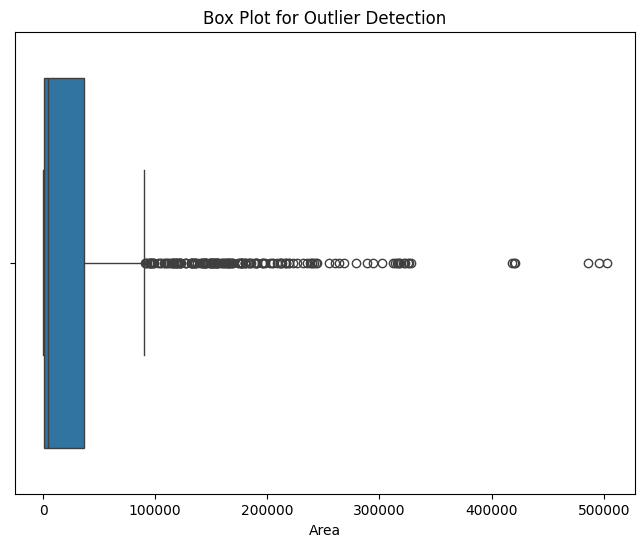

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_prod['Area'])
plt.title('Box Plot for Outlier Detection')
plt.show()

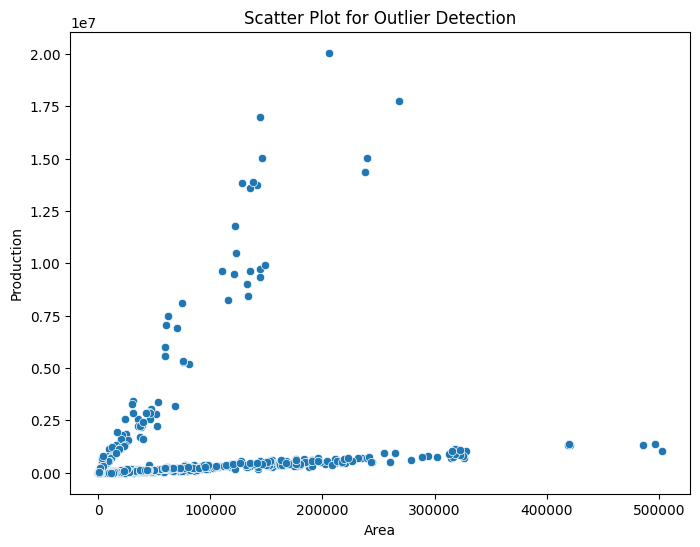

In [61]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_prod['Area'], y=df_prod['Production'])
plt.title('Scatter Plot for Outlier Detection')
plt.show()

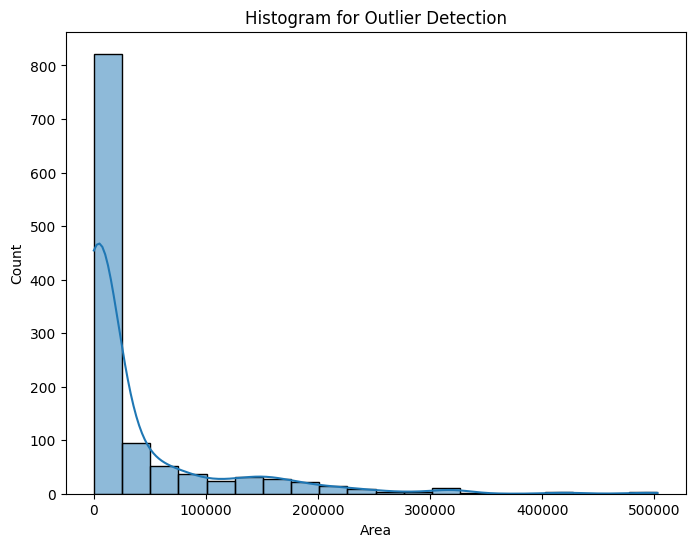

In [62]:
plt.figure(figsize=(8, 6))
sns.histplot(df_prod['Area'], bins=20, kde=True)
plt.title('Histogram for Outlier Detection')
plt.show()

In [63]:
Q1 = df_prod['Area'].quantile(0.25)
Q3 = df_prod['Area'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_prod['Area'] < (Q1 - 1.5 * IQR)) | (df_prod['Area'] > (Q3 + 1.5 * IQR)))

In [64]:
print(outliers)

1       False
2       False
3       False
4       False
5       False
        ...  
1156    False
1157    False
1158    False
1159    False
1160     True
Name: Area, Length: 1158, dtype: bool


In [65]:
df_prod = df_prod[~outliers]

In [66]:
df_prod.head()

,State,District,Year,Season,Crop,Area,Production,Yield
1,Maharashtra,Ahmednagar,2012,Kharif,Maize,45000.0,91900.0,2.042222
2,Maharashtra,Ahmednagar,2012,Kharif,Rice,7500.0,4600.0,0.613333
3,Maharashtra,Ahmednagar,2012,Kharif,Urad,6100.0,1100.0,0.180328
4,Maharashtra,Ahmednagar,2012,Rabi,Maize,14700.0,24800.0,1.687075
5,Maharashtra,Ahmednagar,2012,Rabi,Wheat,38900.0,46100.0,1.185090


In [67]:
Q1 = df_prod['Production'].quantile(0.25)
Q3 = df_prod['Production'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_prod['Production'] < (Q1 - 1.5 * IQR)) | (df_prod['Production'] > (Q3 + 1.5 * IQR)))

In [68]:
print(outliers)

1       False
2       False
3       False
4       False
5       False
        ...  
1155    False
1156    False
1157    False
1158    False
1159    False
Name: Production, Length: 992, dtype: bool


In [69]:
df_prod = df_prod[~outliers]

In [70]:
df_prod.head()

,State,District,Year,Season,Crop,Area,Production,Yield
1,Maharashtra,Ahmednagar,2012,Kharif,Maize,45000.0,91900.0,2.042222
2,Maharashtra,Ahmednagar,2012,Kharif,Rice,7500.0,4600.0,0.613333
3,Maharashtra,Ahmednagar,2012,Kharif,Urad,6100.0,1100.0,0.180328
4,Maharashtra,Ahmednagar,2012,Rabi,Maize,14700.0,24800.0,1.687075
5,Maharashtra,Ahmednagar,2012,Rabi,Wheat,38900.0,46100.0,1.185090


In [71]:
df_prod.tail()

,State,District,Year,Season,Crop,Area,Production,Yield
1155,West Bengal,Purulia,2014,Rabi,Urad,220.0,113.0,0.513636
1156,West Bengal,Purulia,2014,Rabi,Wheat,1622.0,3663.0,2.258323
1157,West Bengal,Purulia,2014,Kharif,Maize,325.0,2039.0,6.273846
1158,West Bengal,Purulia,2014,Kharif,Rice,306.0,801.0,2.617647
1159,West Bengal,Purulia,2014,Whole year,Sugarcane,324.0,16250.0,50.154321


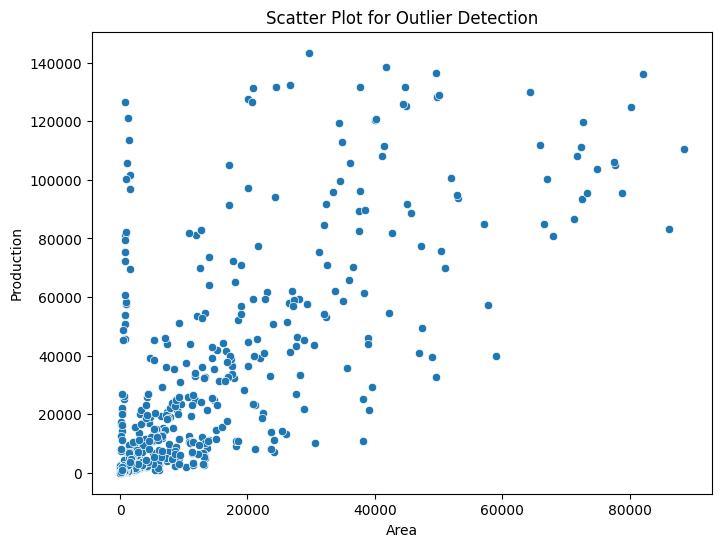

In [72]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_prod['Area'], y=df_prod['Production'])
plt.title('Scatter Plot for Outlier Detection')
plt.show()

### Adding District Wise Data of Soil Type

In [73]:
df_merge = pd.merge(df_prod, df_soil, on=['State', 'District'], how='inner')

In [74]:
df_merge = df_merge.reset_index(drop=True)
df_merge.index += 1

In [75]:
df_merge.head()

,State,District,Year,Season,Crop,Area,Production,Yield,Soil Type
1,Maharashtra,Ahmednagar,2012,Kharif,Maize,45000.0,91900.0,2.042222,"Black Soil, Red Soil, Alluvial Soil, Laterite ..."
2,Maharashtra,Ahmednagar,2012,Kharif,Rice,7500.0,4600.0,0.613333,"Black Soil, Red Soil, Alluvial Soil, Laterite ..."
3,Maharashtra,Ahmednagar,2012,Kharif,Urad,6100.0,1100.0,0.180328,"Black Soil, Red Soil, Alluvial Soil, Laterite ..."
4,Maharashtra,Ahmednagar,2012,Rabi,Maize,14700.0,24800.0,1.687075,"Black Soil, Red Soil, Alluvial Soil, Laterite ..."
5,Maharashtra,Ahmednagar,2012,Rabi,Wheat,38900.0,46100.0,1.185090,"Black Soil, Red Soil, Alluvial Soil, Laterite ..."


In [76]:
df_merge.to_csv('Dataset.csv', index=False)

In [77]:
unique_soil_types = set([soil.strip().lower() for types in df_merge['Soil Type'] for soil in types.split(',')])
soil_dummies = pd.DataFrame({soil_type: [int(1) if soil_type in types.lower() else int(0) for types in df_merge['Soil Type']] for soil_type in unique_soil_types})

print(type(unique_soil_types))

<class 'set'>


In [78]:
print(unique_soil_types)

{'clayey soil', 'loamy soil', 'red soil', 'laterite soil', 'forest soil', 'sandy soil', 'alluvial soil', 'mountain soil', 'black soil'}


In [79]:
soil_dummies = soil_dummies.astype(int)

print(soil_dummies)

     clayey soil  loamy soil  red soil  laterite soil  forest soil  \
0              0           0         1              1            0   
1              0           0         1              1            0   
2              0           0         1              1            0   
3              0           0         1              1            0   
4              0           0         1              1            0   
..           ...         ...       ...            ...          ...   
730            0           0         1              1            0   
731            0           0         1              1            0   
732            0           0         1              1            0   
733            0           0         1              1            0   
734            0           0         1              1            0   

     sandy soil  alluvial soil  mountain soil  black soil  
0             0              1              0           1  
1             0              1         

In [80]:
df_merge = pd.concat([df_merge, soil_dummies], axis=1)

df_merge = df_merge.dropna()

In [81]:
for cn in soil_dummies.columns:
    if cn in df_merge.columns:
        df_merge[cn] = df_merge[cn].astype(int)
print(df_merge)

           State    District    Year  Season   Crop     Area  Production  \
1    Maharashtra  Ahmednagar  2012.0  Kharif  Maize  45000.0     91900.0   
2    Maharashtra  Ahmednagar  2012.0  Kharif   Rice   7500.0      4600.0   
3    Maharashtra  Ahmednagar  2012.0  Kharif   Urad   6100.0      1100.0   
4    Maharashtra  Ahmednagar  2012.0    Rabi  Maize  14700.0     24800.0   
5    Maharashtra  Ahmednagar  2012.0    Rabi  Wheat  38900.0     46100.0   
..           ...         ...     ...     ...    ...      ...         ...   
730  West Bengal     Purulia  2014.0  Kharif   Urad  11493.0      3287.0   
731  West Bengal     Purulia  2014.0    Rabi   Urad    220.0       113.0   
732  West Bengal     Purulia  2014.0    Rabi  Wheat   1622.0      3663.0   
733  West Bengal     Purulia  2014.0  Kharif  Maize    325.0      2039.0   
734  West Bengal     Purulia  2014.0  Kharif   Rice    306.0       801.0   

        Yield                                          Soil Type  clayey soil  \
1    2

In [82]:
df_merge.head()

,State,District,Year,Season,Crop,Area,Production,Yield,Soil Type,clayey soil,loamy soil,red soil,laterite soil,forest soil,sandy soil,alluvial soil,mountain soil,black soil
1,Maharashtra,Ahmednagar,2012.0,Kharif,Maize,45000.0,91900.0,2.042222,"Black Soil, Red Soil, Alluvial Soil, Laterite ...",0,0,1,1,0,0,1,0,1
2,Maharashtra,Ahmednagar,2012.0,Kharif,Rice,7500.0,4600.0,0.613333,"Black Soil, Red Soil, Alluvial Soil, Laterite ...",0,0,1,1,0,0,1,0,1
3,Maharashtra,Ahmednagar,2012.0,Kharif,Urad,6100.0,1100.0,0.180328,"Black Soil, Red Soil, Alluvial Soil, Laterite ...",0,0,1,1,0,0,1,0,1
4,Maharashtra,Ahmednagar,2012.0,Rabi,Maize,14700.0,24800.0,1.687075,"Black Soil, Red Soil, Alluvial Soil, Laterite ...",0,0,1,1,0,0,1,0,1
5,Maharashtra,Ahmednagar,2012.0,Rabi,Wheat,38900.0,46100.0,1.185090,"Black Soil, Red Soil, Alluvial Soil, Laterite ...",0,0,1,1,0,0,1,0,1


In [83]:
df_merge = df_merge.drop('Soil Type', axis=1)

In [84]:
df_merge.to_csv('Dataset.csv', index=False)

In [85]:
df_merge['Area'] = df_merge['Area'].astype(int)
df_merge['Production'] = df_merge['Production'].astype(int)
df_merge['Year'] = df_merge['Year'].astype(int)

In [86]:
print(df_merge.dtypes)

State             object
District          object
Year               int32
Season            object
Crop              object
Area               int32
Production         int32
Yield            float64
clayey soil        int32
loamy soil         int32
red soil           int32
laterite soil      int32
forest soil        int32
sandy soil         int32
alluvial soil      int32
mountain soil      int32
black soil         int32
dtype: object


In [87]:
df_merge.to_csv('Dataset.csv', index=False)

In [88]:
df_merge.head()

,State,District,Year,Season,Crop,Area,Production,Yield,clayey soil,loamy soil,red soil,laterite soil,forest soil,sandy soil,alluvial soil,mountain soil,black soil
1,Maharashtra,Ahmednagar,2012,Kharif,Maize,45000,91900,2.042222,0,0,1,1,0,0,1,0,1
2,Maharashtra,Ahmednagar,2012,Kharif,Rice,7500,4600,0.613333,0,0,1,1,0,0,1,0,1
3,Maharashtra,Ahmednagar,2012,Kharif,Urad,6100,1100,0.180328,0,0,1,1,0,0,1,0,1
4,Maharashtra,Ahmednagar,2012,Rabi,Maize,14700,24800,1.687075,0,0,1,1,0,0,1,0,1
5,Maharashtra,Ahmednagar,2012,Rabi,Wheat,38900,46100,1.185090,0,0,1,1,0,0,1,0,1


In [89]:
df_rain.Year.unique()

df_rain['Year'] = df_rain['Year'].astype(int)

df_rain

,State,District,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,Maharashtra,Ahmednagar,2012,0.0,0.0,0.0,3.5,10.3,40.0,86.0,63.6,90.8,99.2,0.7,0.0,394.1
1,Maharashtra,Ahmednagar,2013,0.0,1.0,0.0,0.0,0.0,142.1,144.1,56.0,182.5,75.5,0.0,0.0,601.2
2,Maharashtra,Ahmednagar,2014,0.1,1.7,32.7,0.1,14.6,21.0,92.9,198.7,44.6,27.6,63.1,3.4,500.5
3,Maharashtra,Beed,2012,0.0,0.0,0.0,0.0,0.0,55.4,107.4,81.6,105.0,81.3,0.9,0.0,431.6
4,Maharashtra,Beed,2013,0.0,0.0,1.2,4.6,2.2,127.6,205.0,92.3,152.8,76.9,3.0,24.9,690.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,West Bengal,Nadia,2013,6.3,9.1,1.5,39.3,149.7,188.1,181.1,327.0,160.7,224.8,0.0,0.2,1287.8
176,West Bengal,Nadia,2014,0.8,50.2,17.1,0.0,92.0,221.4,203.1,236.7,218.8,56.7,0.0,0.0,1096.8
177,West Bengal,Purulia,2012,38.2,25.7,6.3,75.0,37.6,145.9,329.0,316.9,319.0,38.1,52.3,16.9,1400.9
178,West Bengal,Purulia,2013,0.7,13.8,6.7,47.1,294.1,200.9,246.6,302.8,233.8,434.6,0.0,0.0,1781.1


In [90]:
df_merge.describe()

,Year,Area,Production,Yield,clayey soil,loamy soil,red soil,laterite soil,forest soil,sandy soil,alluvial soil,mountain soil,black soil
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,2012.933243,8570.863760,19205.313351,6.187607,0.010899,0.119891,0.504087,0.288828,0.032698,0.053134,0.673025,0.032698,0.386921
std,0.786767,14485.275415,32338.226032,19.796209,0.103899,0.325056,0.500324,0.453527,0.177965,0.224453,0.469428,0.177965,0.487377
min,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,290.750000,371.250000,0.774972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,1700.000000,2905.000000,1.782562,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2014.000000,10905.250000,21725.000000,2.697246,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2014.000000,82100.000000,143404.000000,152.252708,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis

In [91]:
df_rain.Year.unique()

array([2012, 2013, 2014])

In [92]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 1 to 734
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          734 non-null    object 
 1   District       734 non-null    object 
 2   Year           734 non-null    int32  
 3   Season         734 non-null    object 
 4   Crop           734 non-null    object 
 5   Area           734 non-null    int32  
 6   Production     734 non-null    int32  
 7   Yield          734 non-null    float64
 8   clayey soil    734 non-null    int32  
 9   loamy soil     734 non-null    int32  
 10  red soil       734 non-null    int32  
 11  laterite soil  734 non-null    int32  
 12  forest soil    734 non-null    int32  
 13  sandy soil     734 non-null    int32  
 14  alluvial soil  734 non-null    int32  
 15  mountain soil  734 non-null    int32  
 16  black soil     734 non-null    int32  
dtypes: float64(1), int32(12), object(4)
memory usage: 68.8+ KB


In [93]:
df_merge.shape

(734, 17)

In [94]:
monthly_columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
annual_column = 'Annual'

month_colors = sns.color_palette("hsv", n_colors=len(monthly_columns))

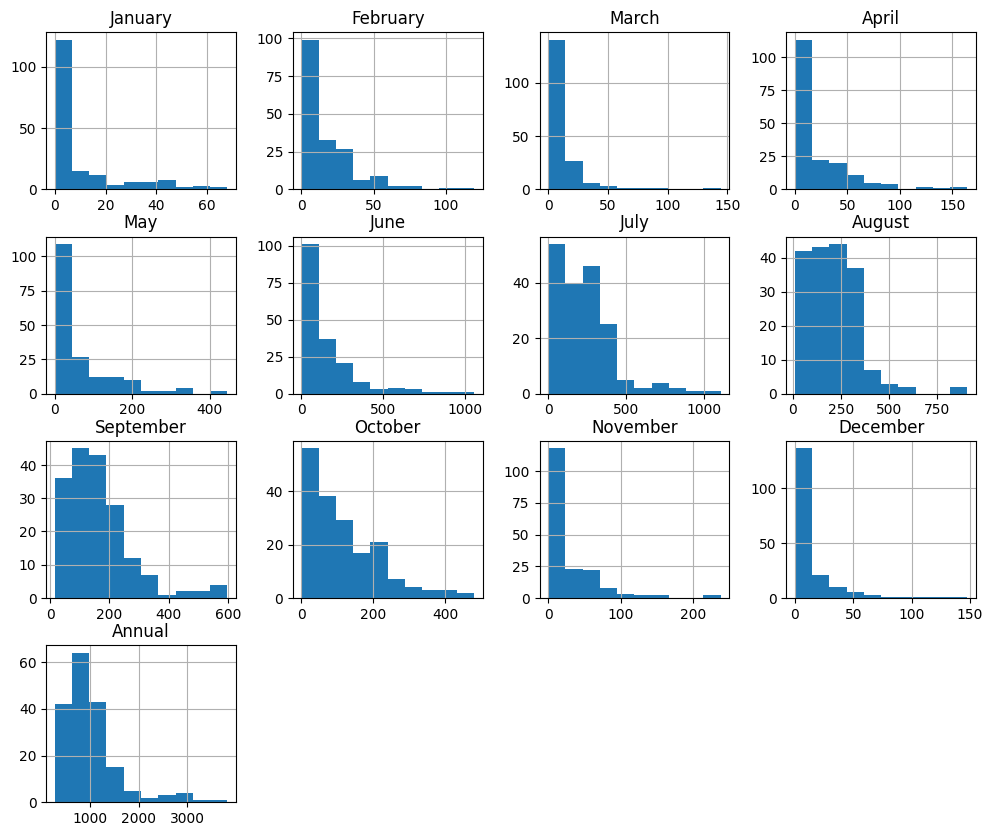

In [95]:
df_rain[monthly_columns + ['Annual']].hist(figsize=(12, 10))
plt.show()

In [96]:
'''colors = [month_colors[i] for i in range(len(monthly_columns))] + ['blue']
df_rain[monthly_columns + [annual_column]].hist(figsize=(15, 12), color=month_colors)
plt.suptitle('Monthly and Annual Rainfall Histograms with Different Colors', y=1.02)
plt.show()'''

"colors = [month_colors[i] for i in range(len(monthly_columns))] + ['blue']\ndf_rain[monthly_columns + [annual_column]].hist(figsize=(15, 12), color=month_colors)\nplt.suptitle('Monthly and Annual Rainfall Histograms with Different Colors', y=1.02)\nplt.show()"

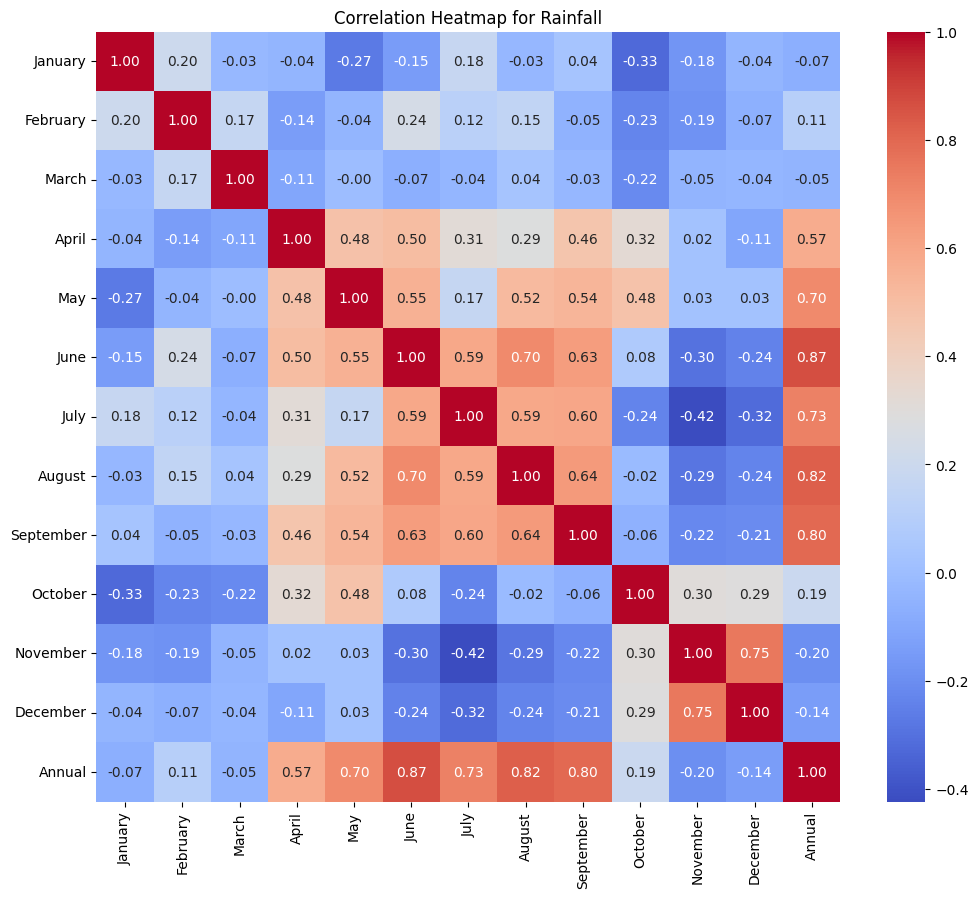

In [97]:
# Correlation heatmap for monthly and annual rainfall
correlation_matrix = df_rain[monthly_columns + ['Annual']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Rainfall')
plt.show()

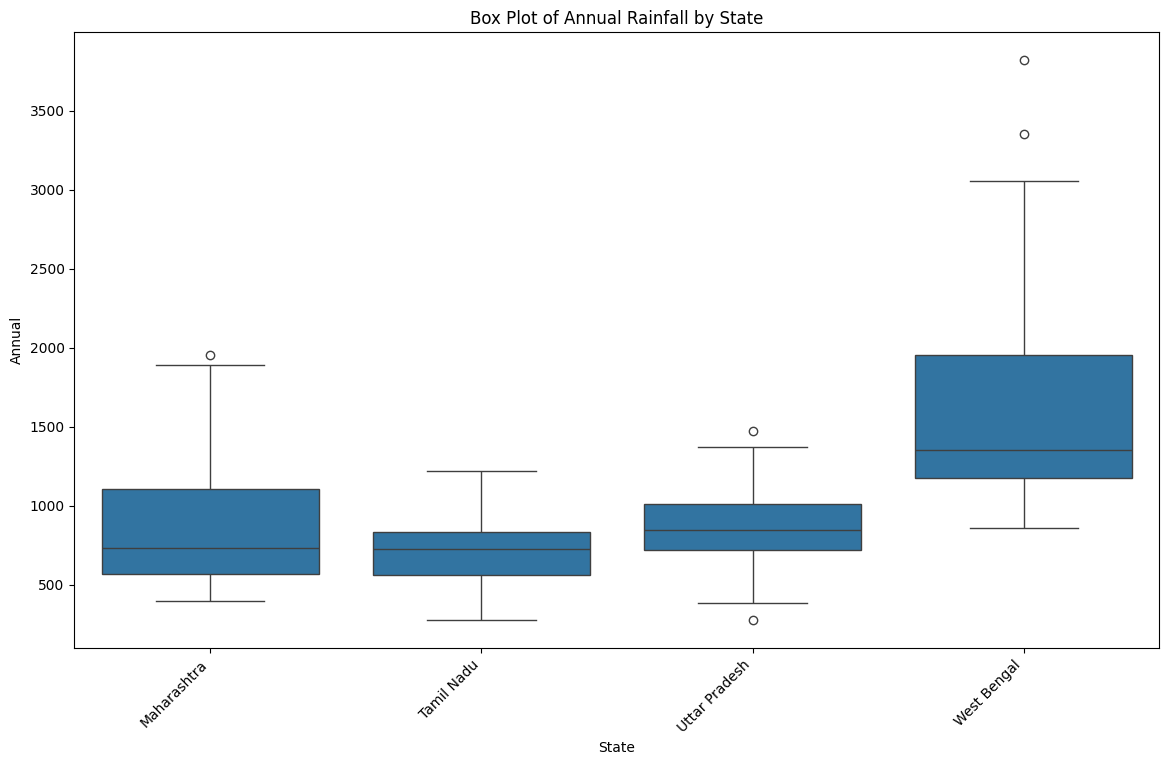

In [98]:
# Box plot for annual rainfall by state
plt.figure(figsize=(14, 8))
sns.boxplot(x='State', y='Annual', data=df_rain)
plt.title('Box Plot of Annual Rainfall by State')
plt.xticks(rotation=45, ha='right')
plt.show()

In [99]:
''' MDist=df_rain[df_rain.State == 'Maharashtra']
k=MDist.sort_values(by=['Annual'])
ax=k.plot.bar(x='District',y='Annual',width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
plt.xlabel('District',fontsize=30)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Rainfall in Districts of Maharashtra',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff() '''

" MDist=df_rain[df_rain.State == 'Maharashtra']\nk=MDist.sort_values(by=['Annual'])\nax=k.plot.bar(x='District',y='Annual',width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))\nplt.xlabel('District',fontsize=30)\nplt.ylabel('Annual Rainfall (in mm)',fontsize=20)\nplt.title('Rainfall in Districts of Maharashtra',fontsize=25)\nax.tick_params(labelsize=20)\nplt.grid()\nplt.ioff() "

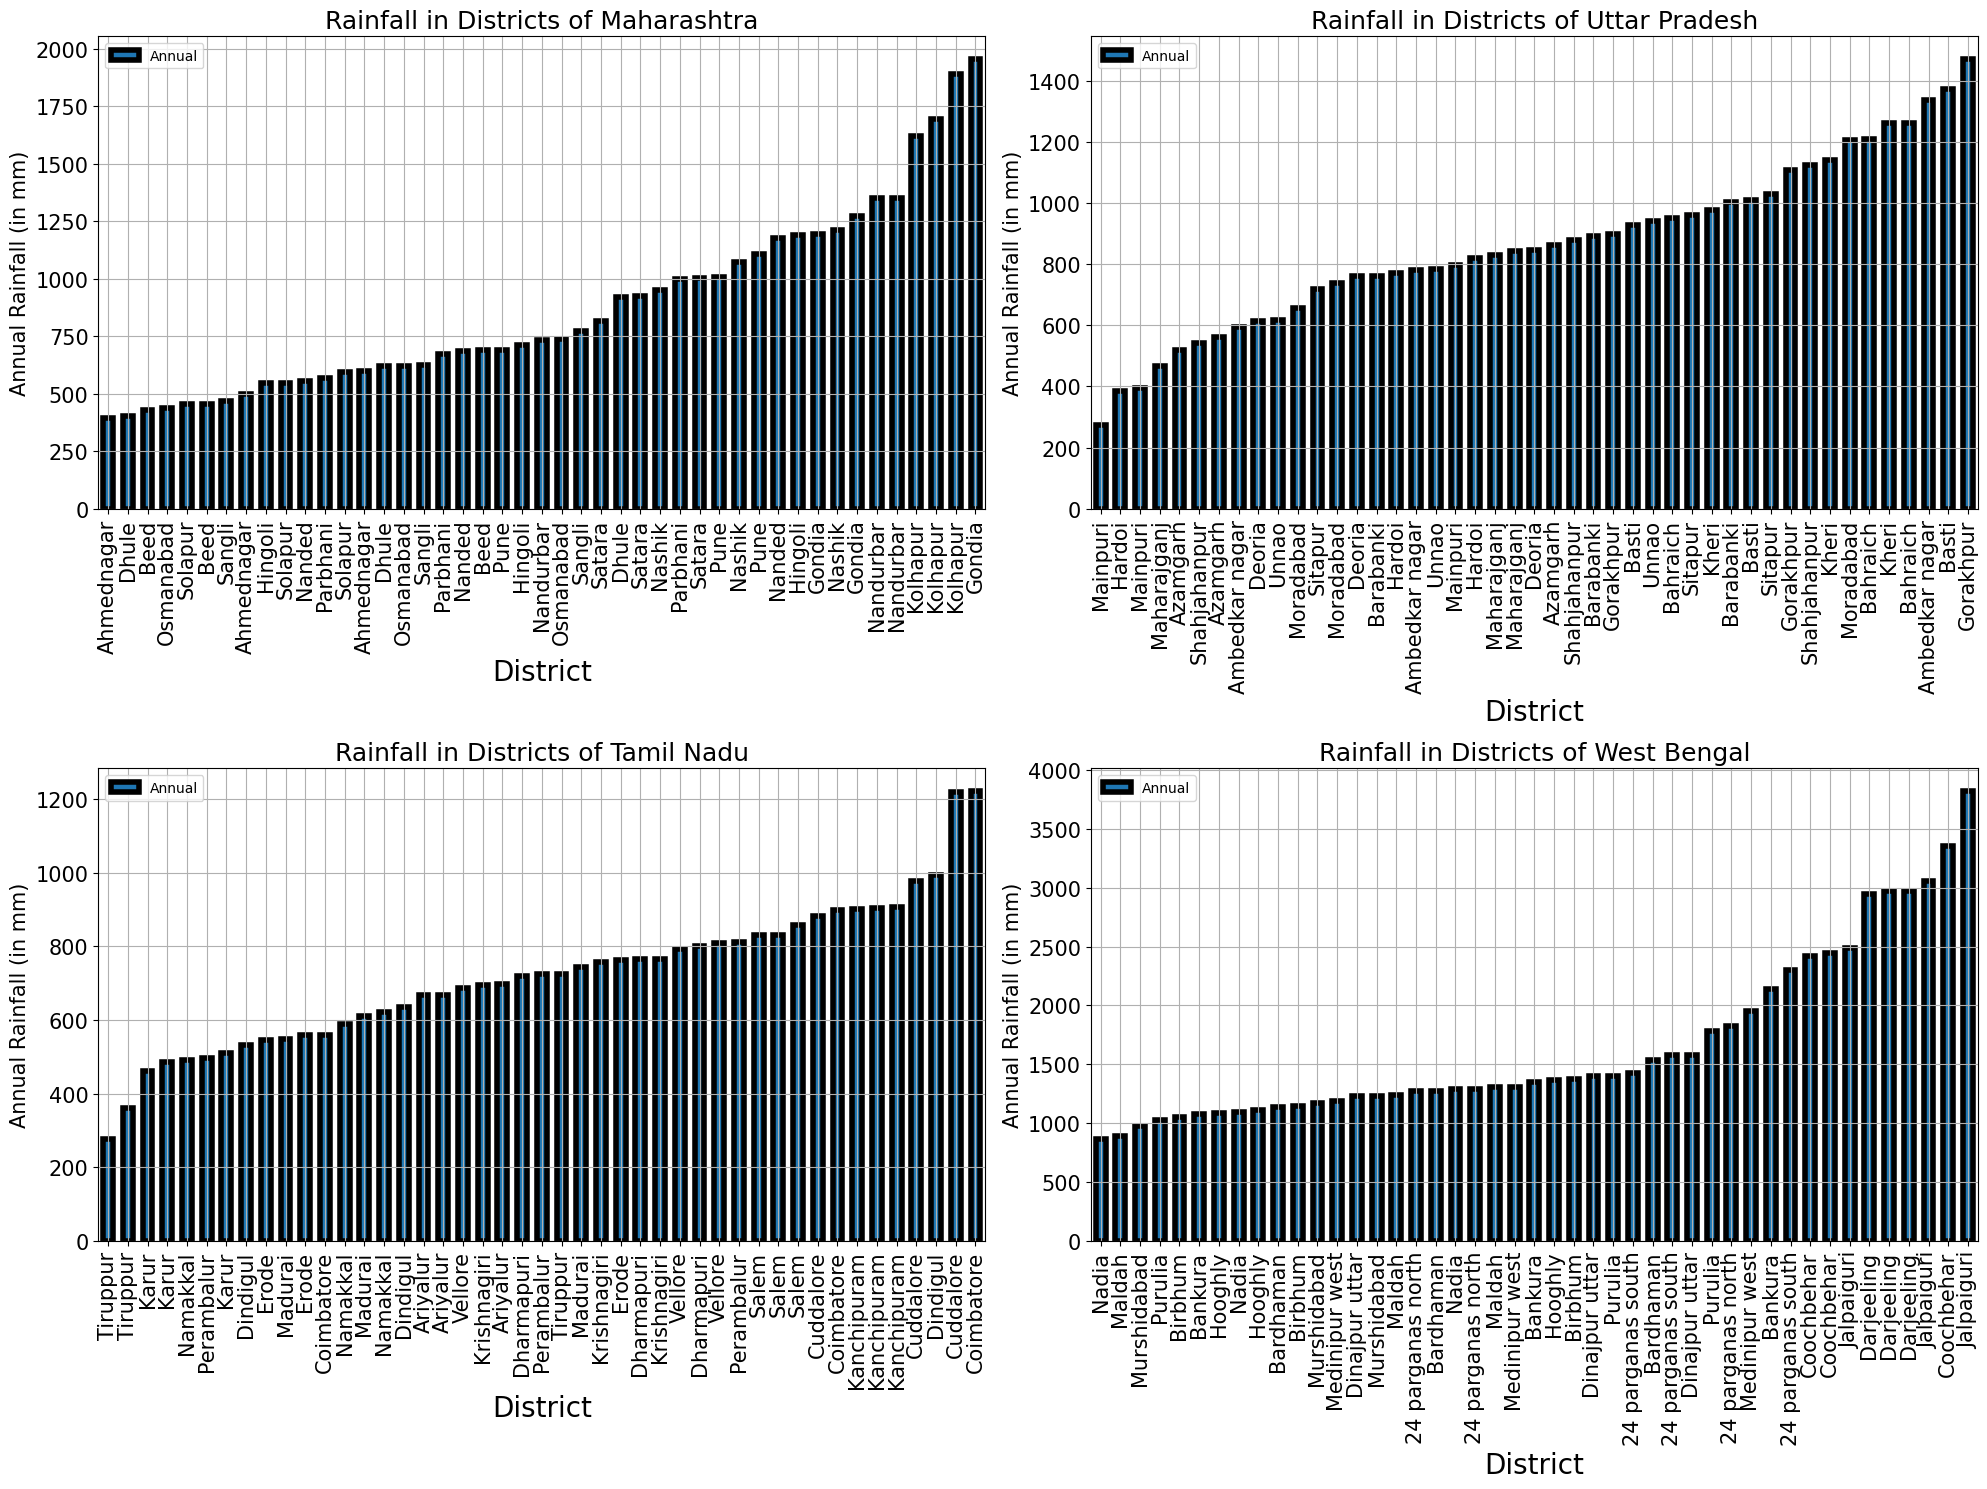

In [100]:
# Define a list of states
states = ['Maharashtra', 'Uttar Pradesh', 'Tamil Nadu', 'West Bengal']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Iterate through states and create bar plots
for i, state in enumerate(states):
    state_data = df_rain[df_rain['State'] == state]
    sorted_data = state_data.sort_values(by=['Annual'])
    ax = sorted_data.plot.bar(x='District', y='Annual', width=0.5, edgecolor='k', align='center', linewidth=4, ax=axes[i // 2, i % 2])
    ax.set_xlabel('District', fontsize=20)
    ax.set_ylabel('Annual Rainfall (in mm)', fontsize=15)
    ax.set_title(f'Rainfall in Districts of {state}', fontsize=18)
    ax.tick_params(labelsize=15)
    ax.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [101]:
df_rain.groupby(['District'])['Annual'].max().sort_values().head(4)

District
Karur         511.3
Solapur       593.8
Ahmednagar    601.2
Namakkal      622.4
Name: Annual, dtype: float64

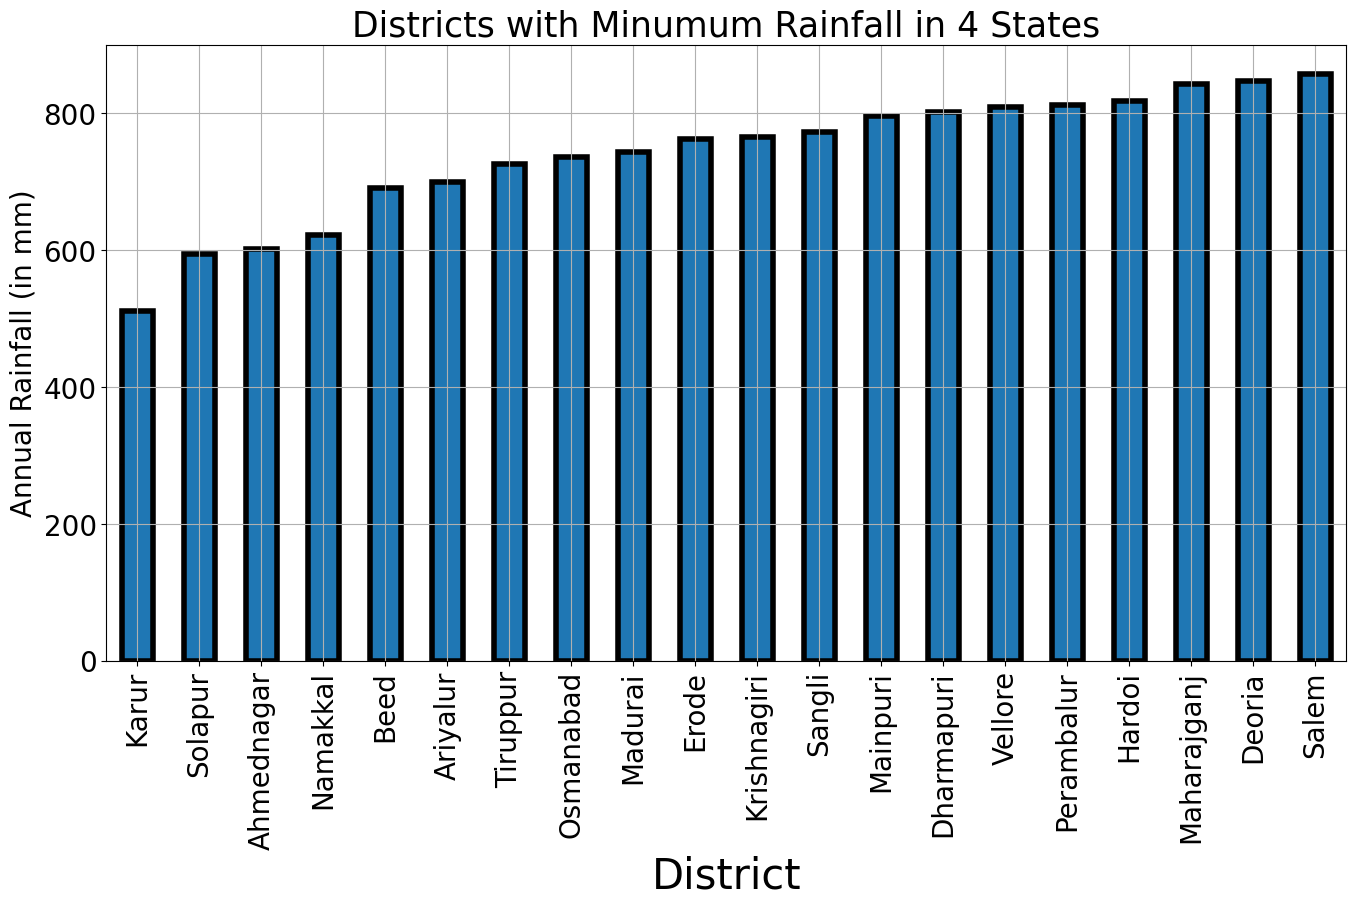

In [102]:
ax=df_rain.groupby(['District'])['Annual'].max().sort_values().head(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
#ax=k.plot.bar(x='DISTRICT',y='ANNUAL',width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
plt.xlabel('District',fontsize=30)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Districts with Minumum Rainfall in 4 States',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

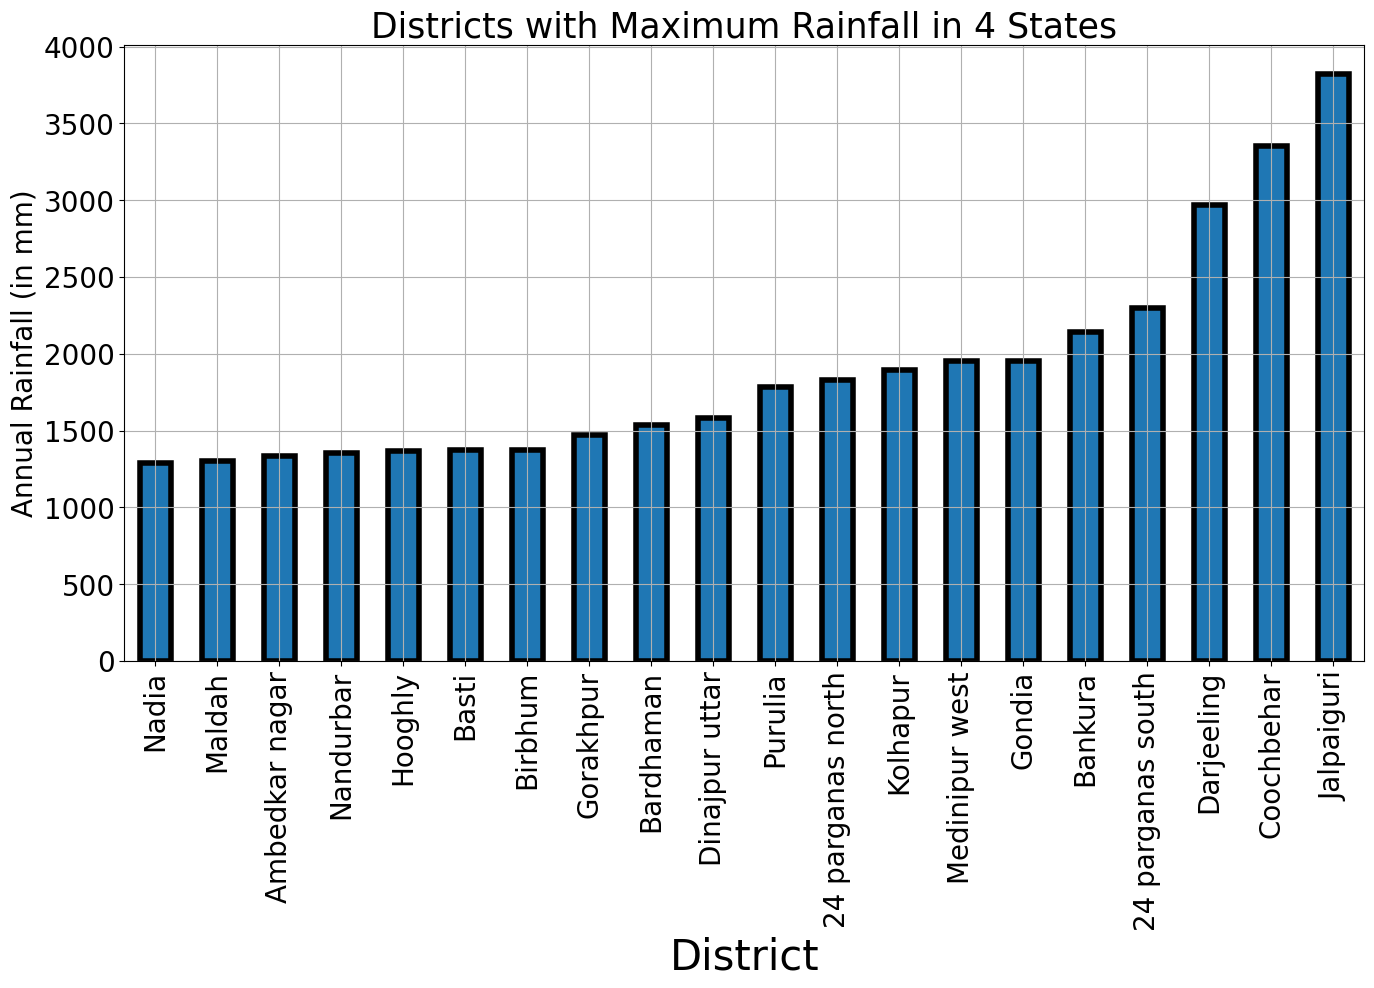

In [103]:
# Group by District and find the maximum annual rainfall, then select the top 20
top_districts = df_rain.groupby(['District'])['Annual'].max().sort_values().tail(20)

# Plot the bar chart
ax = top_districts.plot.bar(width=0.5, edgecolor='k', align='center', linewidth=4, figsize=(16, 8))

# Set labels and title
plt.xlabel('District', fontsize=30)
plt.ylabel('Annual Rainfall (in mm)', fontsize=20)
plt.title('Districts with Maximum Rainfall in 4 States', fontsize=25)

# Adjust tick sizes
ax.tick_params(labelsize=20)

# Show grid and plot
plt.grid()
plt.show()

In [104]:
df_rain.shape

(180, 16)

In [105]:
col = ['State','District','Year']
df_fn = pd.merge(df_merge,df_rain,on=col, how='inner')

In [106]:
df_fn.head()

,State,District,Year,Season,Crop,Area,Production,Yield,clayey soil,loamy soil,...,April,May,June,July,August,September,October,November,December,Annual
0,Maharashtra,Ahmednagar,2012,Kharif,Maize,45000,91900,2.042222,0,0,...,3.5,10.3,40.0,86.0,63.6,90.8,99.2,0.7,0.0,394.1
1,Maharashtra,Ahmednagar,2012,Kharif,Rice,7500,4600,0.613333,0,0,...,3.5,10.3,40.0,86.0,63.6,90.8,99.2,0.7,0.0,394.1
2,Maharashtra,Ahmednagar,2012,Kharif,Urad,6100,1100,0.180328,0,0,...,3.5,10.3,40.0,86.0,63.6,90.8,99.2,0.7,0.0,394.1
3,Maharashtra,Ahmednagar,2012,Rabi,Maize,14700,24800,1.687075,0,0,...,3.5,10.3,40.0,86.0,63.6,90.8,99.2,0.7,0.0,394.1
4,Maharashtra,Ahmednagar,2012,Rabi,Wheat,38900,46100,1.185090,0,0,...,3.5,10.3,40.0,86.0,63.6,90.8,99.2,0.7,0.0,394.1


In [107]:
df_fn.to_csv('Dataset.csv', index=False)

In [108]:
df_fn.describe()

,Year,Area,Production,Yield,clayey soil,loamy soil,red soil,laterite soil,forest soil,sandy soil,...,April,May,June,July,August,September,October,November,December,Annual
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,...,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,2012.933243,8570.863760,19205.313351,6.187607,0.010899,0.119891,0.504087,0.288828,0.032698,0.053134,...,24.719891,61.760490,173.124523,266.890872,231.123161,180.834469,93.976839,17.759946,7.299183,1100.081608
std,0.786767,14485.275415,32338.226032,19.796209,0.103899,0.325056,0.500324,0.453527,0.177965,0.224453,...,33.867011,100.216763,202.647672,203.275830,152.619656,124.994056,88.877070,33.793483,15.091032,682.862679
min,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.100000,0.100000,31.500000,28.000000,0.000000,0.000000,0.000000,275.100000
25%,2012.000000,290.750000,371.250000,0.774972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.700000,1.500000,39.775000,127.100000,112.500000,94.200000,32.200000,0.000000,0.000000,655.500000
50%,2013.000000,1700.000000,2905.000000,1.782562,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,10.700000,17.200000,111.300000,239.900000,211.250000,155.400000,67.500000,1.100000,0.650000,921.100000
75%,2014.000000,10905.250000,21725.000000,2.697246,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,34.500000,74.300000,220.200000,329.000000,304.200000,221.000000,133.300000,22.650000,8.300000,1260.800000
max,2014.000000,82100.000000,143404.000000,152.252708,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,164.400000,445.500000,1057.300000,1110.900000,911.000000,598.000000,479.600000,236.700000,132.600000,3820.800000


In [109]:
df_fn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          734 non-null    object 
 1   District       734 non-null    object 
 2   Year           734 non-null    int32  
 3   Season         734 non-null    object 
 4   Crop           734 non-null    object 
 5   Area           734 non-null    int32  
 6   Production     734 non-null    int32  
 7   Yield          734 non-null    float64
 8   clayey soil    734 non-null    int32  
 9   loamy soil     734 non-null    int32  
 10  red soil       734 non-null    int32  
 11  laterite soil  734 non-null    int32  
 12  forest soil    734 non-null    int32  
 13  sandy soil     734 non-null    int32  
 14  alluvial soil  734 non-null    int32  
 15  mountain soil  734 non-null    int32  
 16  black soil     734 non-null    int32  
 17  January        734 non-null    float64
 18  February  

In [110]:
df_fn.Crop.value_counts()

Crop
Maize        310
Urad         202
Rice         109
Wheat         76
Sugarcane     37
Name: count, dtype: int64

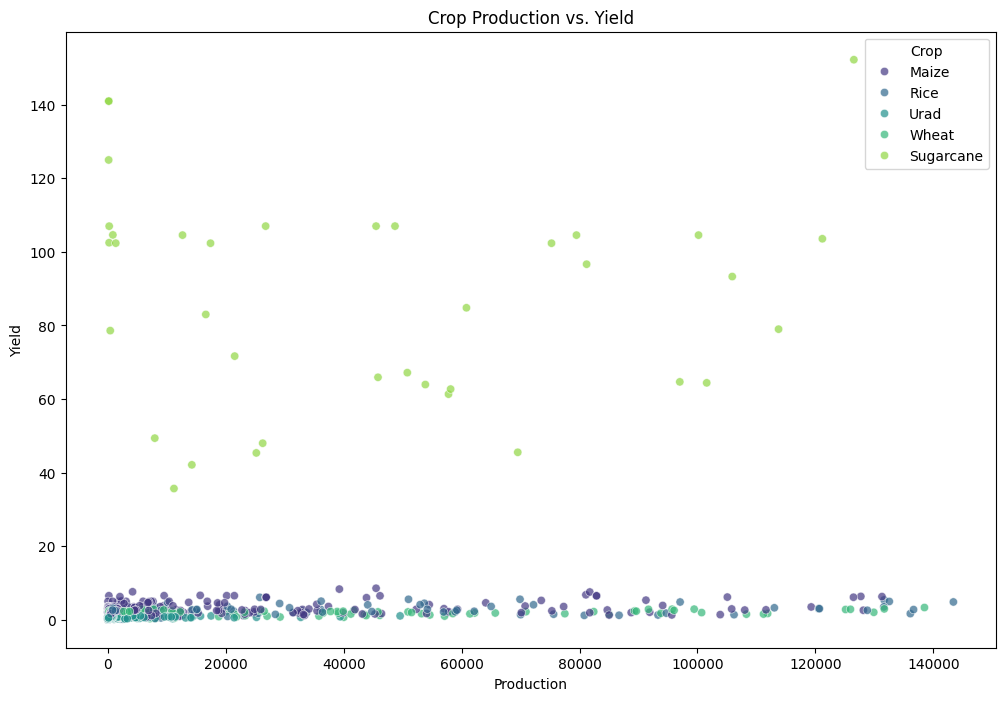

In [111]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Production', y='Yield', data=df_fn, hue='Crop', palette='viridis', alpha=0.7)
plt.title('Crop Production vs. Yield')
plt.show()

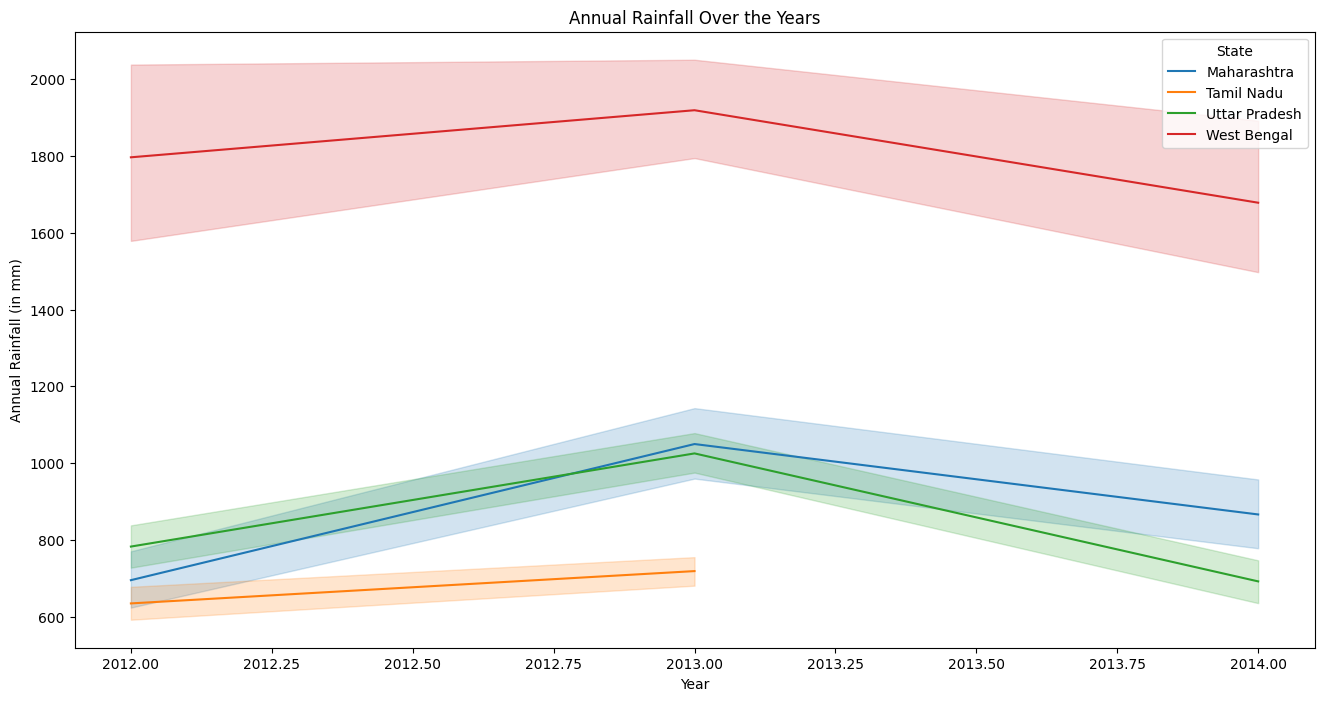

In [112]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='Year', y='Annual', hue='State', data=df_fn)
plt.title('Annual Rainfall Over the Years')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (in mm)')
plt.show()

C:\Users\vansi\AppData\Local\Temp\ipykernel_11312\964559999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Annual', data=df_fn, palette='Set3')


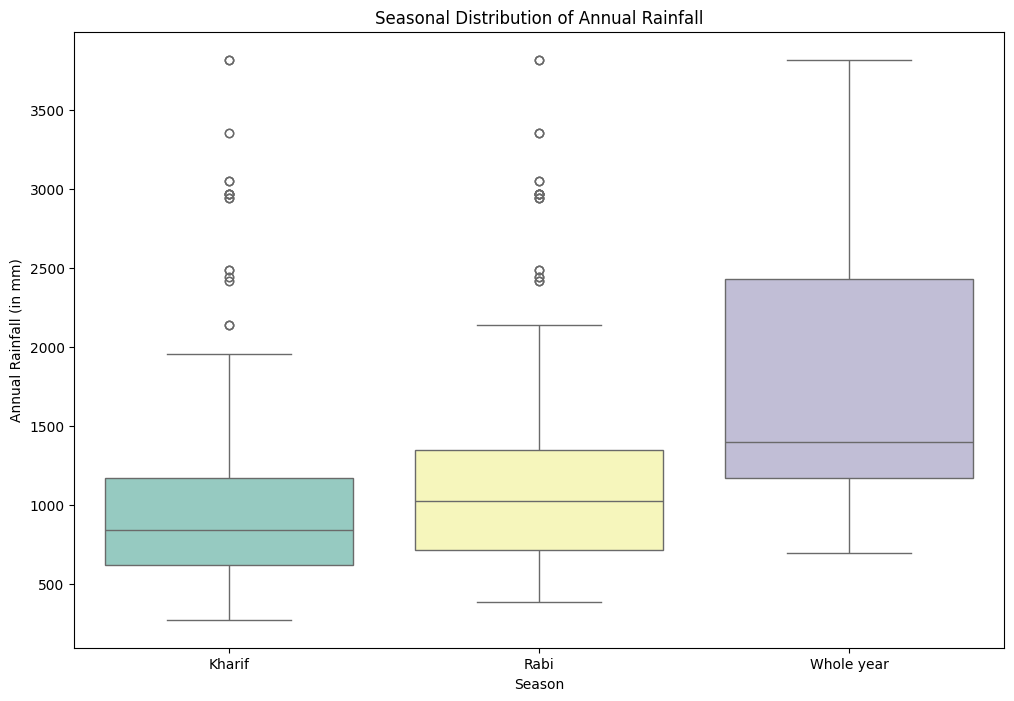

In [113]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Season', y='Annual', data=df_fn, palette='Set3')
plt.title('Seasonal Distribution of Annual Rainfall')
plt.xlabel('Season')
plt.ylabel('Annual Rainfall (in mm)')
plt.show()

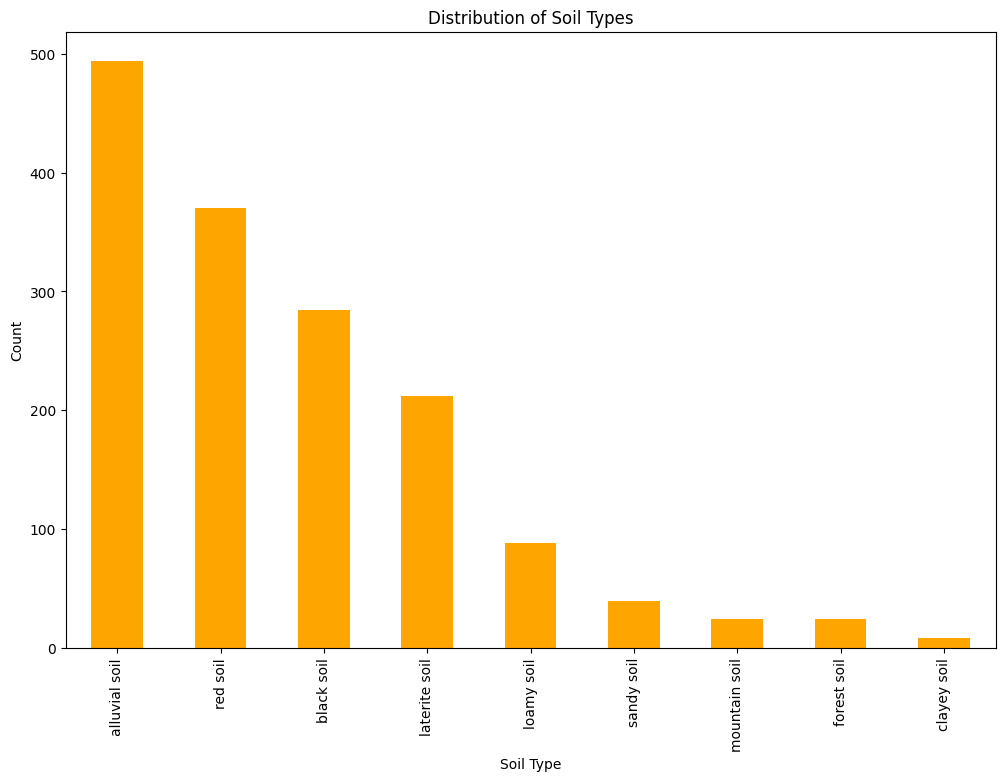

In [114]:
soil_columns = ['red soil', 'mountain soil', 'sandy soil', 'alluvial soil', 'black soil', 'forest soil', 'loamy soil', 'clayey soil', 'laterite soil']

soil_distribution = df_fn[soil_columns].sum().sort_values(ascending=False)
soil_distribution.plot(kind='bar', figsize=(12, 8), color='orange')
plt.title('Distribution of Soil Types')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.show()

In [115]:
top_crops_statewise = df_fn.groupby(['State', 'Crop'])['Area'].sum().groupby('State', group_keys=False).nlargest(1)
print(top_crops_statewise)

State          Crop 
Maharashtra    Wheat    1412200
Tamil Nadu     Maize     287891
Uttar Pradesh  Maize     671059
West Bengal    Wheat     518004
Name: Area, dtype: int32


In [116]:
top_crops_districtwise = df_fn.groupby(['State', 'District', 'Crop'])['Area'].sum().groupby(['State', 'District'], group_keys=False).nlargest(1)
print(top_crops_districtwise)

State          District        Crop     
Maharashtra    Ahmednagar      Wheat        148000
               Beed            Wheat        144600
               Dhule           Wheat        120700
               Gondia          Rice          35200
               Kolhapur        Wheat         32500
               Nanded          Wheat        108800
               Nandurbar       Maize         98600
               Nashik          Rice         211700
               Osmanabad       Urad          76300
               Parbhani        Wheat         56800
               Pune            Wheat        189100
               Sangli          Maize        109500
               Satara          Rice         154300
               Solapur         Maize        128600
Tamil Nadu     Ariyalur        Rice          41960
               Coimbatore      Maize         10044
               Cuddalore       Urad          91371
               Dharmapuri      Rice          38692
               Dindigul        Maize     

In [117]:
soil_types = ['red soil', 'mountain soil', 'sandy soil', 'alluvial soil', 'black soil', 'forest soil', 'loamy soil', 'clayey soil', 'laterite soil']

top_crops_soilwise = {}
for soil_type in soil_types:
    top_crops_soilwise[soil_type] = df_fn[df_fn[soil_type] == 1].groupby('Crop')['Area'].sum().nlargest(1)

for soil_type, crops in top_crops_soilwise.items():
    print(f"\nTop Crop in {soil_type}:\n{crops}")


Top Crop in red soil:
Crop
Wheat    1647036
Name: Area, dtype: int32

Top Crop in mountain soil:
Crop
Rice    59100
Name: Area, dtype: int32

Top Crop in sandy soil:
Crop
Maize    303803
Name: Area, dtype: int32

Top Crop in alluvial soil:
Crop
Maize    1250833
Name: Area, dtype: int32

Top Crop in black soil:
Crop
Wheat    1412200
Name: Area, dtype: int32

Top Crop in forest soil:
Crop
Rice    59100
Name: Area, dtype: int32

Top Crop in loamy soil:
Crop
Maize    447361
Name: Area, dtype: int32

Top Crop in clayey soil:
Crop
Rice    41960
Name: Area, dtype: int32

Top Crop in laterite soil:
Crop
Wheat    933087
Name: Area, dtype: int32


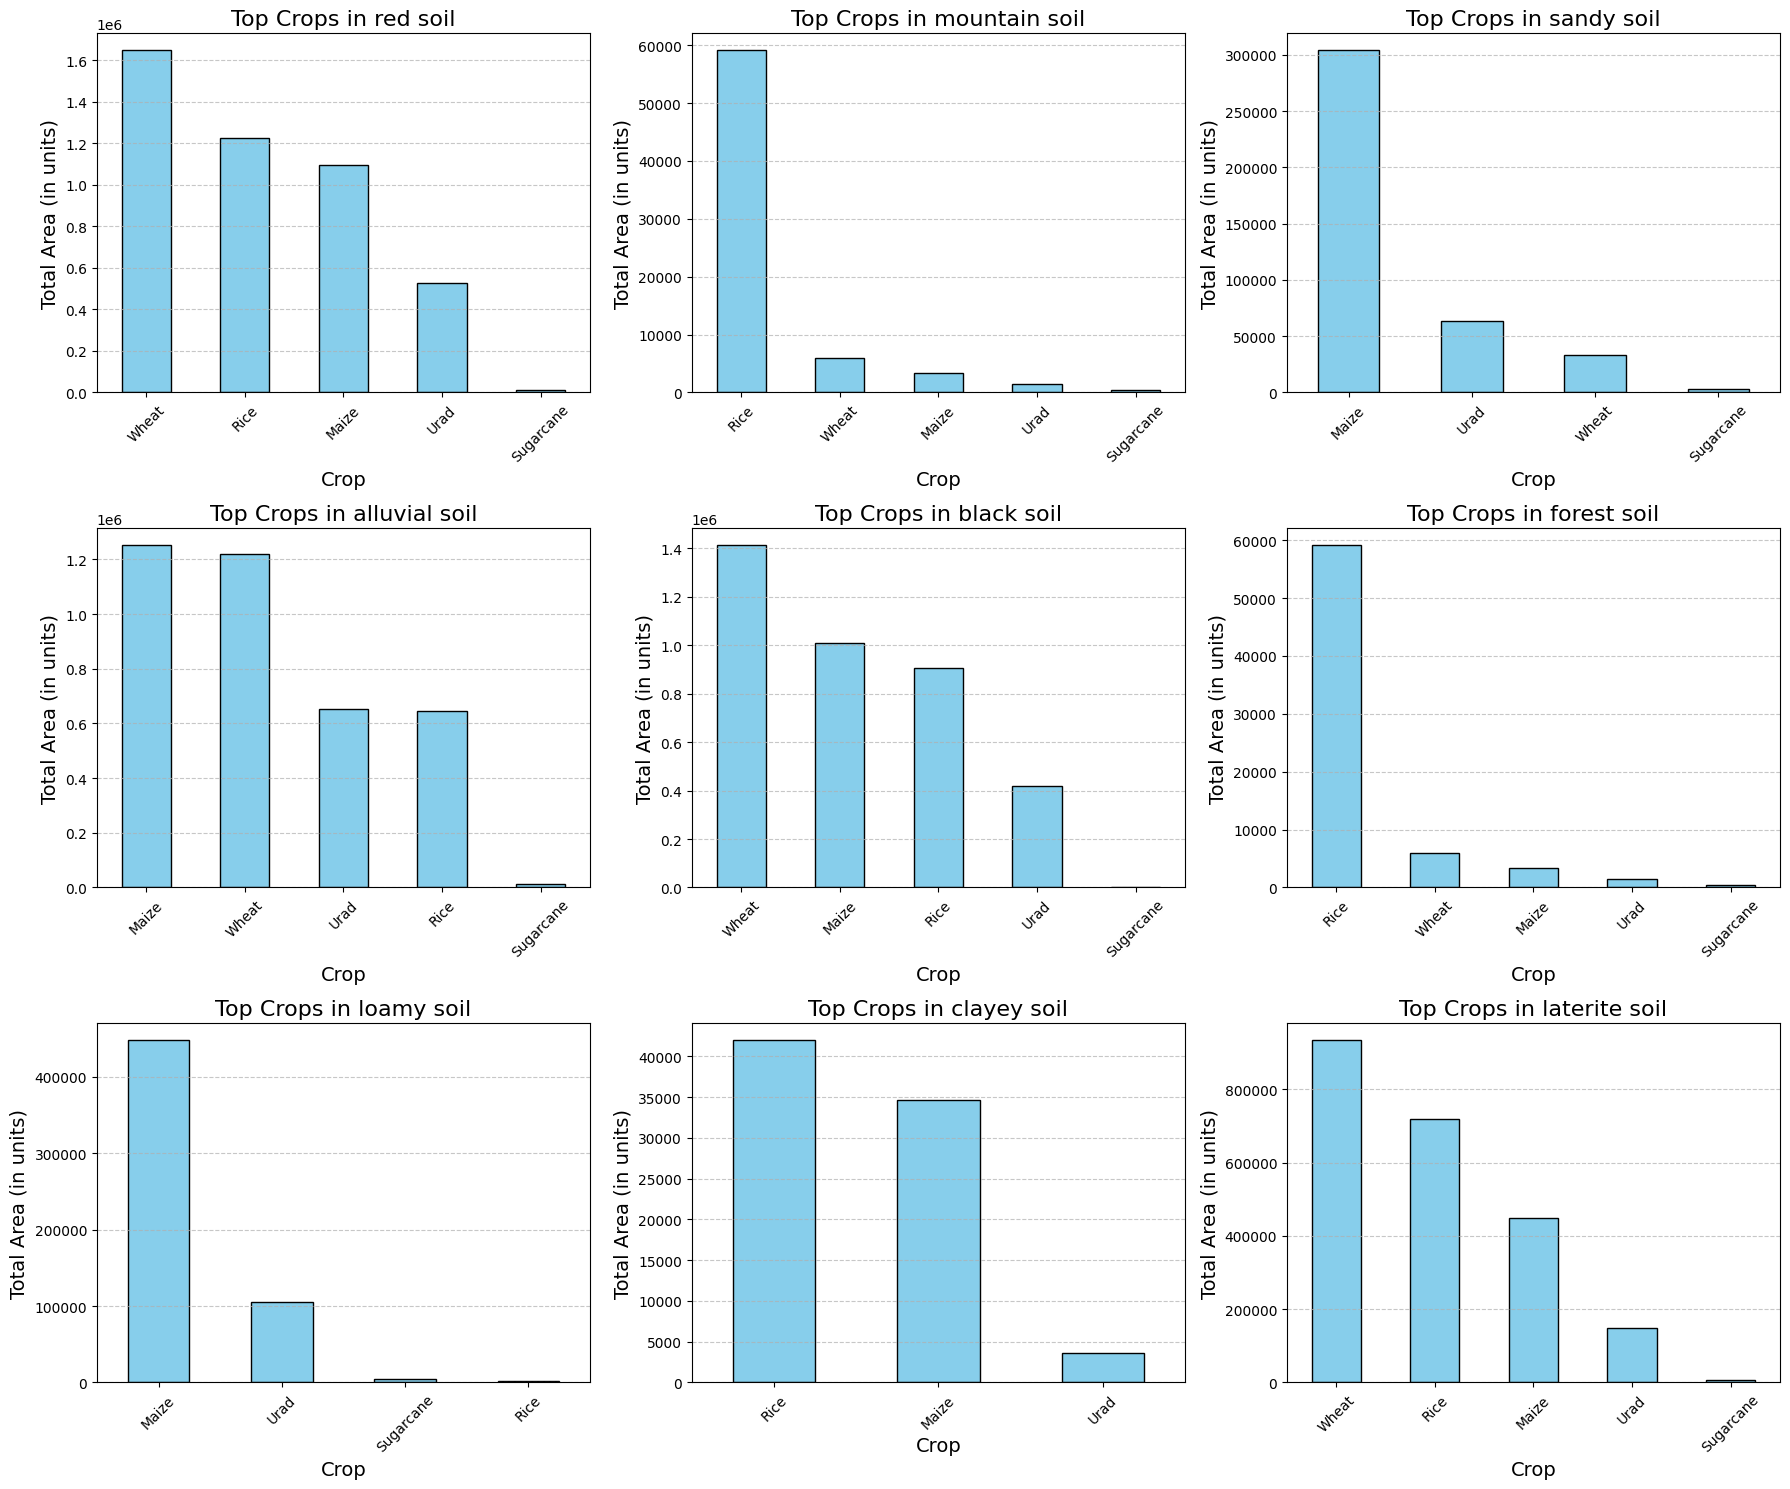

In [118]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Flatten the axes for easier indexing
axes = axes.flatten()

# EDA for each soil type
for i, soil_type in enumerate(soil_types):
    # Extract the top crops for the current soil type
    top_crops = df_fn[df_fn[soil_type] == 1].groupby('Crop')['Area'].sum().nlargest(5)
    
    # Plot the top crops for the current soil type
    top_crops.plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    
    # Set plot title and labels
    axes[i].set_title(f'Top Crops in {soil_type}', fontsize=16)
    axes[i].set_xlabel('Crop', fontsize=14)
    axes[i].set_ylabel('Total Area (in units)', fontsize=14)
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

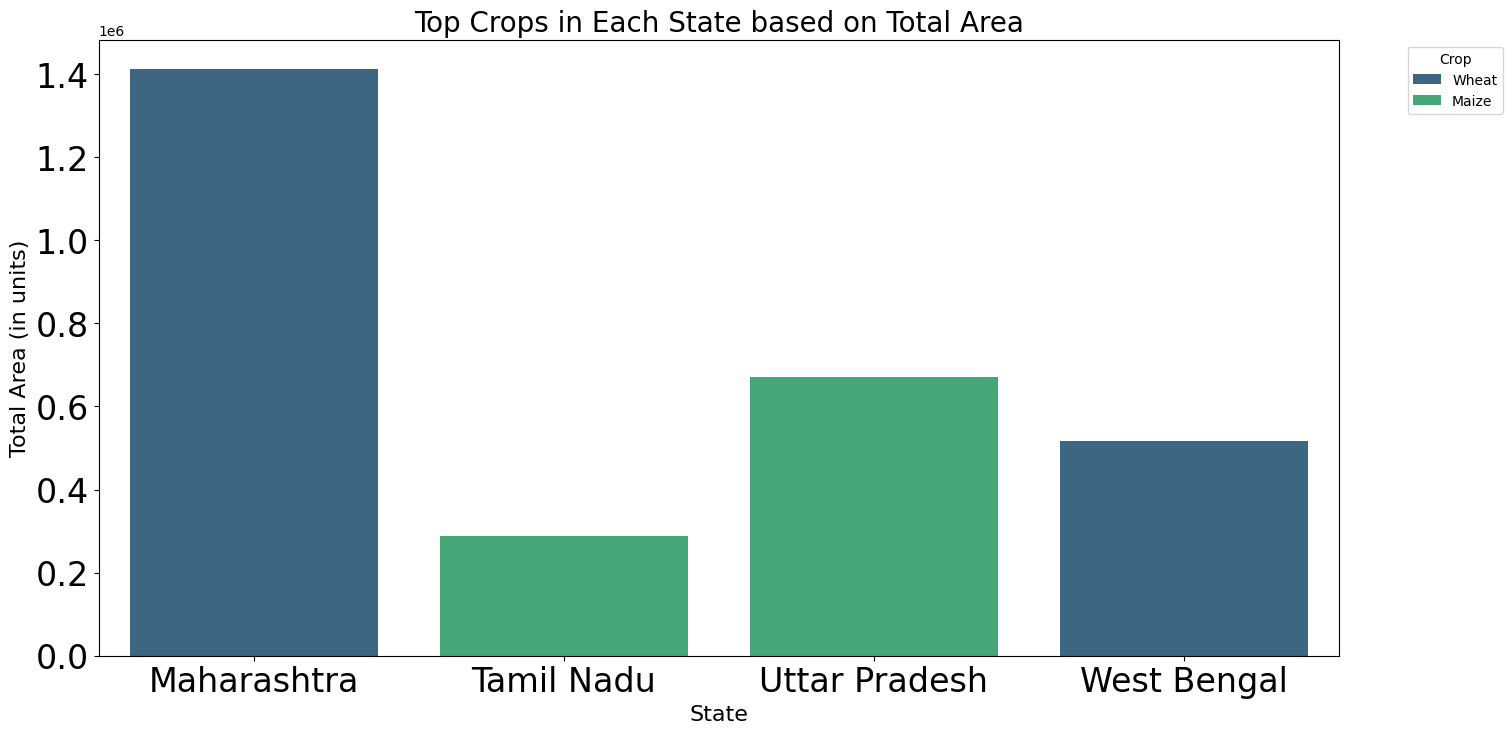

In [135]:
# Create a figure and axis
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='State', y='Area', hue='Crop', data=top_crops_statewise.reset_index(), palette='viridis')

# Set plot title and labels
plt.title('Top Crops in Each State based on Total Area', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Total Area (in units)', fontsize=16)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Add legend
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

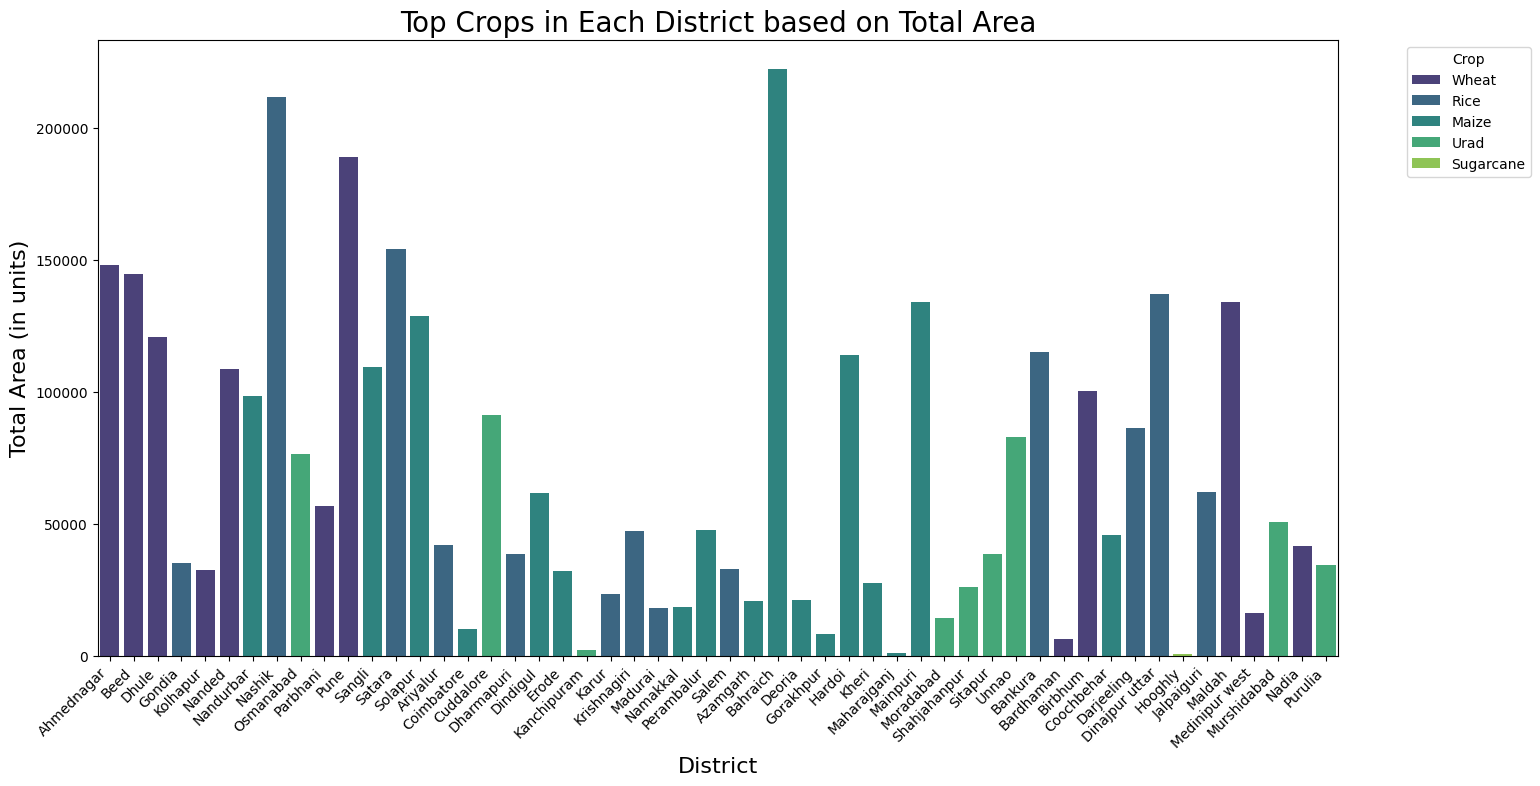

In [120]:
# Create a figure and axis
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='District', y='Area', hue='Crop', data=top_crops_districtwise.reset_index(), palette='viridis')

# Set plot title and labels
plt.title('Top Crops in Each District based on Total Area', fontsize=20)
plt.xlabel('District', fontsize=16)
plt.ylabel('Total Area (in units)', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

## Data Preprocessing

In [121]:
Mean_Seasonal_Rainfall = []
count = 0

for season in df_fn["Season"]:
    if season == "Kharif":
        x = (df_fn["July"] + df_fn["August"] + df_fn["September"] + df_fn["October"]) / 4
        Mean_Seasonal_Rainfall.append(x[count])
    elif season == "Rabi":
        x = (df_fn["November"] + df_fn["December"] + df_fn["January"] + df_fn["February"] + df_fn["March"]) / 5
        Mean_Seasonal_Rainfall.append(x[count])
    else:
        x = (df_fn["July"] + df_fn["August"] + df_fn["September"] + df_fn["October"] +
             df_fn["November"] + df_fn["December"] + df_fn["January"] + df_fn["February"] + df_fn["March"] +
             df_fn["April"] + df_fn["May"] + df_fn["June"]) / 12
        Mean_Seasonal_Rainfall.append(x[count])

    count += 1

df_fn["Mean_Seasonal_Rainfall"] = Mean_Seasonal_Rainfall

In [122]:
df_fn.head()

,State,District,Year,Season,Crop,Area,Production,Yield,clayey soil,loamy soil,...,May,June,July,August,September,October,November,December,Annual,Mean_Seasonal_Rainfall
0,Maharashtra,Ahmednagar,2012,Kharif,Maize,45000,91900,2.042222,0,0,...,10.3,40.0,86.0,63.6,90.8,99.2,0.7,0.0,394.1,84.90
1,Maharashtra,Ahmednagar,2012,Kharif,Rice,7500,4600,0.613333,0,0,...,10.3,40.0,86.0,63.6,90.8,99.2,0.7,0.0,394.1,84.90
2,Maharashtra,Ahmednagar,2012,Kharif,Urad,6100,1100,0.180328,0,0,...,10.3,40.0,86.0,63.6,90.8,99.2,0.7,0.0,394.1,84.90
3,Maharashtra,Ahmednagar,2012,Rabi,Maize,14700,24800,1.687075,0,0,...,10.3,40.0,86.0,63.6,90.8,99.2,0.7,0.0,394.1,0.14
4,Maharashtra,Ahmednagar,2012,Rabi,Wheat,38900,46100,1.185090,0,0,...,10.3,40.0,86.0,63.6,90.8,99.2,0.7,0.0,394.1,0.14


In [123]:
df_fn.columns

Index(['State', 'District', 'Year', 'Season', 'Crop', 'Area', 'Production',
       'Yield', 'clayey soil', 'loamy soil', 'red soil', 'laterite soil',
       'forest soil', 'sandy soil', 'alluvial soil', 'mountain soil',
       'black soil', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'Annual', 'Mean_Seasonal_Rainfall'],
      dtype='object')

In [124]:
col = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Annual', 'State']

df_fn.drop(col, axis=1, inplace=True)

In [125]:
df_fn.head()

,District,Year,Season,Crop,Area,Production,Yield,clayey soil,loamy soil,red soil,laterite soil,forest soil,sandy soil,alluvial soil,mountain soil,black soil,Mean_Seasonal_Rainfall
0,Ahmednagar,2012,Kharif,Maize,45000,91900,2.042222,0,0,1,1,0,0,1,0,1,84.90
1,Ahmednagar,2012,Kharif,Rice,7500,4600,0.613333,0,0,1,1,0,0,1,0,1,84.90
2,Ahmednagar,2012,Kharif,Urad,6100,1100,0.180328,0,0,1,1,0,0,1,0,1,84.90
3,Ahmednagar,2012,Rabi,Maize,14700,24800,1.687075,0,0,1,1,0,0,1,0,1,0.14
4,Ahmednagar,2012,Rabi,Wheat,38900,46100,1.185090,0,0,1,1,0,0,1,0,1,0.14


In [126]:
df_fn.columns

Index(['District', 'Year', 'Season', 'Crop', 'Area', 'Production', 'Yield',
       'clayey soil', 'loamy soil', 'red soil', 'laterite soil', 'forest soil',
       'sandy soil', 'alluvial soil', 'mountain soil', 'black soil',
       'Mean_Seasonal_Rainfall'],
      dtype='object')

In [127]:
categorical_columns = ['District', 'Crop', 'Season']

In [128]:
df_final = pd.get_dummies(df_fn, columns=categorical_columns)

In [129]:
dtypes = {col: int if col != 'Yield' else float for col in df_final.columns}

In [130]:
df_final = df_final.astype(dtypes)

In [131]:
df_final.head()

,Year,Area,Production,Yield,clayey soil,loamy soil,red soil,laterite soil,forest soil,sandy soil,...,District_Solapur,District_Unnao,Crop_Maize,Crop_Rice,Crop_Sugarcane,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Whole year
0,2012,45000,91900,2.042222,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2012,7500,4600,0.613333,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2012,6100,1100,0.180328,0,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,2012,14700,24800,1.687075,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2012,38900,46100,1.185090,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [132]:
df_final.to_csv('Dataset.csv', index=False)

In [133]:
df_final.head()

,Year,Area,Production,Yield,clayey soil,loamy soil,red soil,laterite soil,forest soil,sandy soil,...,District_Solapur,District_Unnao,Crop_Maize,Crop_Rice,Crop_Sugarcane,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Whole year
0,2012,45000,91900,2.042222,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2012,7500,4600,0.613333,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2012,6100,1100,0.180328,0,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,2012,14700,24800,1.687075,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2012,38900,46100,1.185090,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [134]:
df_final.shape

(734, 74)